In [15]:
#The goal of this program is to show how an ideal gas distribution for N particles gives a single particle
#  distribution proportional to a Gaussian when the number of particles becomes large

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt
#math has more complicated math operations like sin, cos, exp, ...
import math

#random distribution: flat distribution in x giving xstddev as the standard deviation
def RanFlat(xstddev):
    return xstddev*(2.0*np.random.rand()-1.0)*math.sqrt(3.0)

#set the size scale for the standard deviation
pstddev = 5.0

#initialize arrays for the velocity distribution with empty values to be filled in the loops below
nbin = 200
binp = np.empty(nbin)
#binth will hold the theoretical distribution function sqrt(alpha/pi) exp(-alpha v^2) with alpha = 1/(2 xstddev^2)
binth = np.empty(nbin)
#vbin will hold the center values for the velocity bins
pbin = np.empty(nbin)

#set parameters to use for the distribution function
p0 =-7.0*pstddev
pf = 7.0*pstddev
dpbin = (pf - p0)/nbin

#definine how many particles are in the gas
npart = 20

#define the P-positions of the distribution function, the ideal gas distribution, the relevant Gaussian
nb=0
while nb<nbin:
    pbin[nb] = p0 + (nb+0.5)*dpbin
    #put in the exact 1D distribution vs one particle momentum
    binp[nb] = pow(1.0-pbin[nb]*pbin[nb]/npart/pstddev/pstddev,0.5*(npart-1))
    #put in the Gaussian approximation to the momentum distribution of one particle
    binth[nb] = math.exp(-pbin[nb]*pbin[nb]*0.5/pstddev/pstddev)
    nb+=1


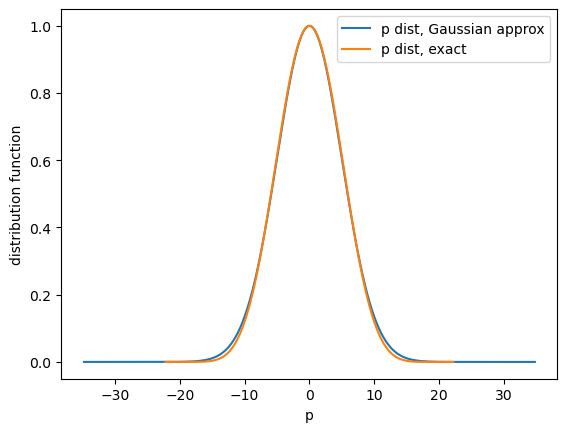

In [16]:
#plot the vx and vy velocity distribution and compare to a thermal velocity distribution
plt.plot(pbin,binth,label='p dist, Gaussian approx')
plt.plot(pbin,binp,label='p dist, exact')
plt.legend()
plt.xlabel('p')
plt.ylabel('distribution function')
plt.show()